In [2]:
from nba_py import game
from nba_py import player
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



documentation (kinda) available at https://github.com/seemethere/nba_py


Box score stuff is cool, but not particularly well formated/documented for what I need it for. Instead can use PER and player stats to identify an NBA player's prime. 

In [ ]:
boxscore_summary = game.BoxscoreSummary("0021600458")


In [ ]:
boxad = game.BoxscoreAdvanced("0021600458")

In [ ]:
boxad.sql_team_advanced()

In [ ]:
boxscore_summary.line_score()

In [ ]:
boxad.sql_team_advanced()

In [ ]:
boxscore_summary = game.BoxscoreSummary("0001600458")


In [3]:
players = player.PlayerList()

In [ ]:
type(players.info())

In [ ]:
boxscore_summary.other_stats()

In [ ]:
boxscore_summary.game_summary()

Summary
-------
It is not possible to mine this data for team rebounds, etc. at least using this API. 

Player Queries
-------------

Done below, see how I grab Lebron, and turn him into an instance and then can learn different things about him. Can do this for any player, and construct whatever sort of table for whatever sort of prediction next.

I also found how to make a shot chart

In [6]:
bron = player.get_player(first_name='Lebron',last_name='James')

In [10]:
bron.values[0]

2544

In [19]:
lbj =player.PlayerCareer(2544)

In [20]:
from nba_py import shotchart

In [21]:
lbj = shotchart.ShotChart(2544)

In [23]:
df = lbj.shot_chart()

In [34]:
df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700001,72,2544,LeBron James,1610612739,Cleveland Cavaliers,1,6,26,Missed Shot,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,17,92,143,1,0,20171017,CLE,BOS
1,Shot Chart Detail,0021700001,82,2544,LeBron James,1610612739,Cleveland Cavaliers,1,5,44,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,21,-145,162,1,1,20171017,CLE,BOS
2,Shot Chart Detail,0021700001,94,2544,LeBron James,1610612739,Cleveland Cavaliers,1,4,31,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,9,11,1,1,20171017,CLE,BOS
3,Shot Chart Detail,0021700001,190,2544,LeBron James,1610612739,Cleveland Cavaliers,2,10,28,Missed Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,22,-228,-1,1,0,20171017,CLE,BOS
4,Shot Chart Detail,0021700001,194,2544,LeBron James,1610612739,Cleveland Cavaliers,2,10,17,Made Shot,Cutting Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,8,1,1,1,20171017,CLE,BOS
5,Shot Chart Detail,0021700001,202,2544,LeBron James,1610612739,Cleveland Cavaliers,2,9,29,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,3,9,1,1,20171017,CLE,BOS
6,Shot Chart Detail,0021700001,282,2544,LeBron James,1610612739,Cleveland Cavaliers,2,4,15,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Right Side(R),8-16 ft.,9,70,68,1,1,20171017,CLE,BOS
7,Shot Chart Detail,0021700001,316,2544,LeBron James,1610612739,Cleveland Cavaliers,2,0,57,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,18,183,32,1,1,20171017,CLE,BOS
8,Shot Chart Detail,0021700001,360,2544,LeBron James,1610612739,Cleveland Cavaliers,3,10,25,Made Shot,Running Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-6,21,1,1,20171017,CLE,BOS
9,Shot Chart Detail,0021700001,381,2544,LeBron James,1610612739,Cleveland Cavaliers,3,9,7,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-210,162,1,0,20171017,CLE,BOS


In [33]:
df['EVENT_TYPE']  #hot encode this

0       Missed Shot
1         Made Shot
2         Made Shot
3       Missed Shot
4         Made Shot
5         Made Shot
6         Made Shot
7         Made Shot
8         Made Shot
9       Missed Shot
10      Missed Shot
11        Made Shot
12      Missed Shot
13        Made Shot
14        Made Shot
15      Missed Shot
16        Made Shot
17        Made Shot
18      Missed Shot
19      Missed Shot
20      Missed Shot
21        Made Shot
22      Missed Shot
23        Made Shot
24        Made Shot
25        Made Shot
26      Missed Shot
27      Missed Shot
28        Made Shot
29        Made Shot
30        Made Shot
31        Made Shot
32        Made Shot
33      Missed Shot
34        Made Shot
35        Made Shot
36      Missed Shot
37        Made Shot
38        Made Shot
39      Missed Shot
40        Made Shot
41        Made Shot
42        Made Shot
43        Made Shot
44      Missed Shot
45      Missed Shot
46        Made Shot
47      Missed Shot
48      Missed Shot
49      Missed Shot


In [26]:
xs = df['LOC_X']
ys = df['LOC_Y']

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

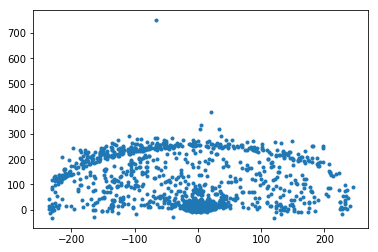

In [30]:
plt.plot(xs,ys,'.')

In [16]:
lbj =player.PlayerGeneralSplits(2544)

In [18]:
lbj.win_losses()  #get his stats in wins and losses!

,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,Wins/Losses,Wins,50,50,0,1.0,37.4,10.8,19.6,0.552,2.1,5.2,0.415,5.2,6.9,0.752,1.3,7.9,9.3,10.0,3.9,1.5,0.7,0.7,1.6,5.4,29.0,8.8,57.8,38,14,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,2,1,1,1,1,1,1,32,Wins
1,Wins/Losses,Losses,32,0,32,0.0,36.1,9.9,18.8,0.527,1.3,4.6,0.284,4.0,5.8,0.690,0.9,6.7,7.7,7.7,4.8,1.3,1.1,1.1,1.7,5.2,25.1,-10.5,48.4,14,4,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,1,2,2,2,2,2,2,32,Losses


In [9]:
lbj.regular_season_rankings()

IndexError: list index out of range